# EDA

## Importing moduls

And configuting settings

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import pandas_profiling as pp
import seaborn as sns
import sweetviz as sv

from lib.data_viz_functions import *

In [2]:
filterwarnings("ignore")
sns.set()

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

%matplotlib inline

In [3]:
train = pd.read_pickle("data/2022-03-30_train_preprocessed.pkl.zip", compression="zip")
test = pd.read_pickle("data/2022-03-30_test_preprocessed.pkl.zip", compression="zip")

## Feature description

- **body_type** - Type of vehicle body (седан, купе, хэтчбек...)  
- **brand** - Manufacture name (bmw, audi...)  
- **color** - Main car's body color  
- **description** - Seller's car description  
- **engine_displacement** - Volume of car's engine (nan if electro)  
- **engine_power** - Engine power in horse powers  
- **fuel_type** - Fuel type (diesel, gasoline, electro...)  
- **km_age** - Vehicle mileage  
- **model_year** - Year when model production was started  
- **number_of_doors** - Number of doors  
- **production_year** - Production year of this car  
- **vehicle_transmission** - Transmission type (auto, robot, mech...)  
- **vendor** - Origin country of brand (EUROPIAN, CHINEESE...)  
- **oweners** - Count of oweners of car  
- **owenership_duration** - Owenership duration  
- **ptc** - Vehicle Registration Certificate (YES, NO, DUP)  
- **drive** - Car drive (4WD, FRONT, REAR)  
- **wheel** - Wheel position in car (RIGHT, LEFT)  
- **price** - Our target column - Car Price  

### Dicts and Lists block

In [4]:
valid_columns_dict = {
    "bodyType": "body_type",
    "engineDisplacement": "engine_displacement",
    "enginePower": "engine_power",
    "fuelType": "fuel_type",
    "mileage": "km_age",
    "modelDate": "model_year",
    "numberOfDoors": "number_of_doors",
    "productionDate": "production_year",
    "vehicleTransmission": "vehicle_transmission",
    "Владельцы": "owners",
    "Владение": "ownership_duration",
    "ПТС": "ptc",
    "Привод": "drive",
    "Руль": "wheel",
}

In [5]:
def get_nans_in_percents(df):
    nans = df.isna().sum() / df.shape[0] * 100
    return nans[nans > 0]

### Changing columns names to english and snake-type (from dict)

In [6]:
train.rename(columns=valid_columns_dict, inplace=True)
test.rename(columns=valid_columns_dict, inplace=True)

## Grouping cols as categorical and numeric

In [7]:
cat_cols = [
    "body_type",
    "brand",
    "color",
    "fuel_type",
    "number_of_doors",
    "vehicle_transmission",
    "vendor",
    "owners",
    "ptc",
    "drive",
    "wheel",
]
nums_cols = [
    "engine_displacement",
    "engine_power",
    "km_age",
    "model_year",
    "production_year",
    "ownership_duration",
]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121928 entries, 0 to 121929
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   body_type             121928 non-null  object 
 1   brand                 121928 non-null  object 
 2   color                 121928 non-null  object 
 3   description           118716 non-null  object 
 4   engine_displacement   121747 non-null  float64
 5   engine_power          121928 non-null  float32
 6   fuel_type             121928 non-null  object 
 7   km_age                116053 non-null  float64
 8   model_year            121928 non-null  float32
 9   number_of_doors       121928 non-null  float32
 10  production_year       121928 non-null  float32
 11  vehicle_transmission  121928 non-null  object 
 12  vendor                121928 non-null  object 
 13  owners                105518 non-null  float64
 14  ownership_duration    34967 non-null   float64
 15  

## Discovering NA

In [9]:
get_nans_in_percents(train)

description             2.634342
engine_displacement     0.148448
km_age                  4.818417
owners                 13.458763
ownership_duration     71.321600
ptc                     5.103832
drive                   4.818417
wheel                   4.819238
dtype: float64

In [10]:
get_nans_in_percents(test)

engine_displacement     0.158565
ownership_duration     65.418324
ptc                     0.002883
parsed_date             0.051894
dtype: float64

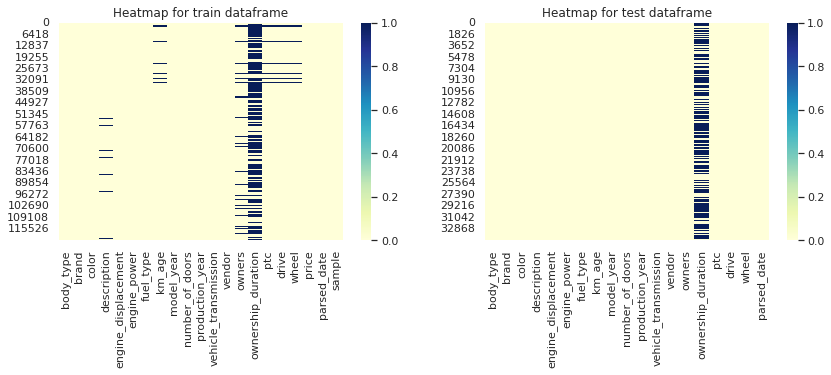

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.heatmap(train.isna(), cmap="YlGnBu", ax=ax[0]).set_title(
    "Heatmap for train dataframe"
)
sns.heatmap(test.isna(), cmap="YlGnBu", ax=ax[1]).set_title(
    "Heatmap for test dataframe"
)
plt.show()

## Numeric variables overview

In [12]:
describe_nums(train[nums_cols + ["price"]])

,unique,n/a count,count,mean,std,min,25%,50%,75%,max
km_age,28798,5875,116053.000000,140065.370675,99642.175288,0.000000,69000.000000,132462.000000,196000.000000,1000000.000000
price,13375,0,121928.000000,1541134.983892,2143136.342353,16000.000000,405000.000000,800000.000000,1819735.000000,99000000.000000
ownership_duration,536,86961,34967.000000,1681.123888,1309.933208,0.000000,701.000000,1305.000000,2404.000000,15615.000000
engine_power,408,0,121928.000000,178.314545,86.179718,11.000000,120.000000,150.000000,218.000000,800.000000
production_year,81,0,121928.000000,2011.328369,7.060874,1904.000000,2007.000000,2012.000000,2017.000000,2021.000000
model_year,80,0,121928.000000,2009.093506,7.396151,1904.000000,2005.000000,2010.000000,2015.000000,2021.000000
engine_displacement,68,181,121747.000000,2.259859,1.507975,0.700000,1.600000,2.000000,2.500000,300.000000


Unique values count: 68 
Q1: 1.600000023841858
Q3: 2.5
IQR: 0.8999999761581421 
Outliers borders: [0.2500000596046448, 3.849999964237213]


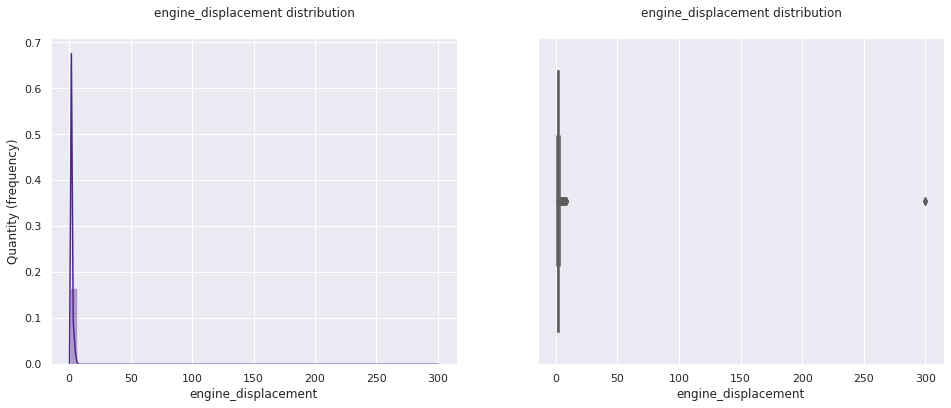

Unique values count: 408 
Q1: 120.0
Q3: 218.0
IQR: 98.0 
Outliers borders: [-27.0, 365.0]


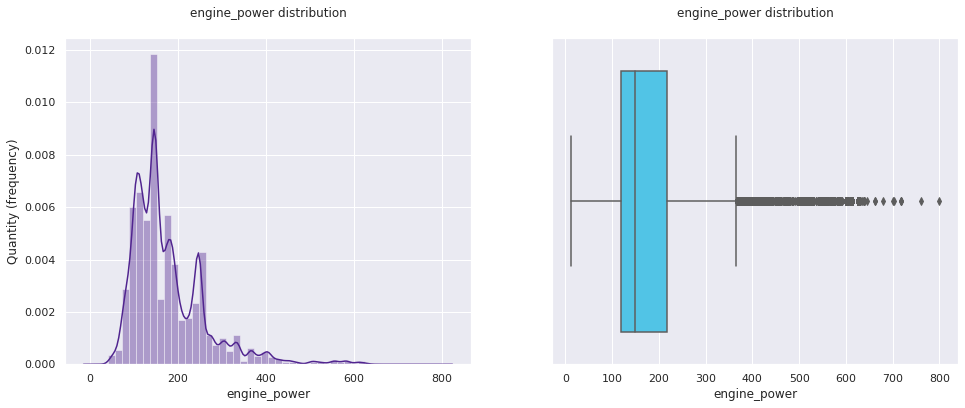

Unique values count: 28798 
Q1: 69000.0
Q3: 196000.0
IQR: 127000.0 
Outliers borders: [-121500.0, 386500.0]


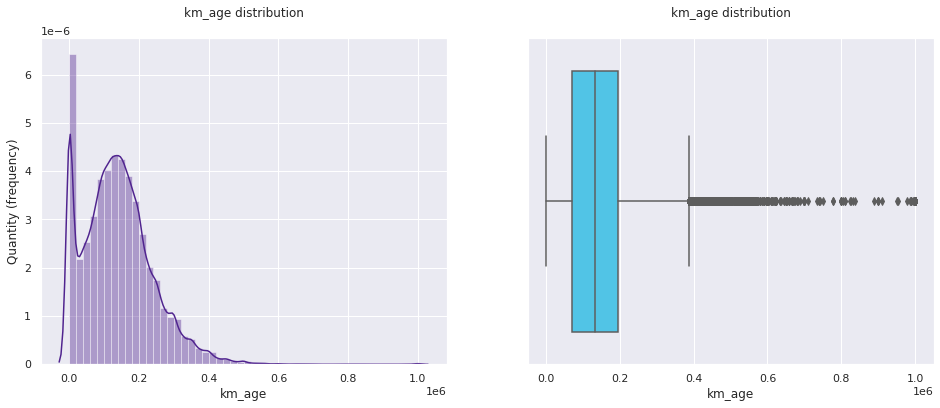

Unique values count: 80 
Q1: 2005.0
Q3: 2015.0
IQR: 10.0 
Outliers borders: [1990.0, 2030.0]


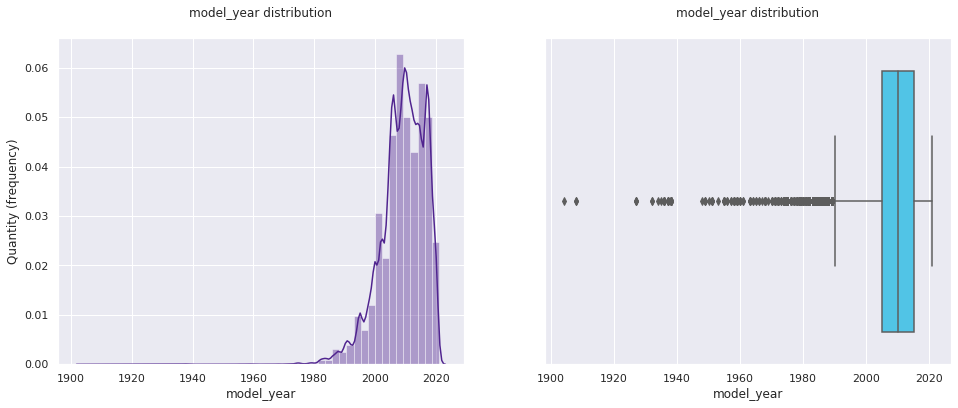

Unique values count: 81 
Q1: 2007.0
Q3: 2017.0
IQR: 10.0 
Outliers borders: [1992.0, 2032.0]


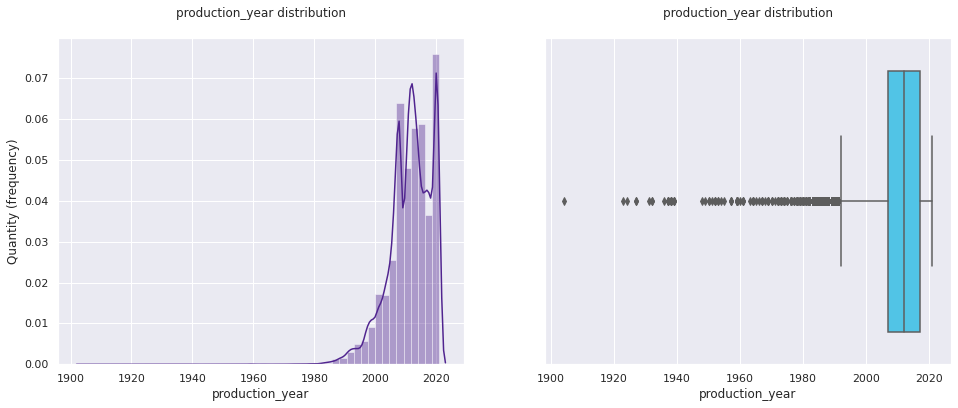

Unique values count: 536 
Q1: 701.0
Q3: 2404.0
IQR: 1703.0 
Outliers borders: [-1853.5, 4958.5]


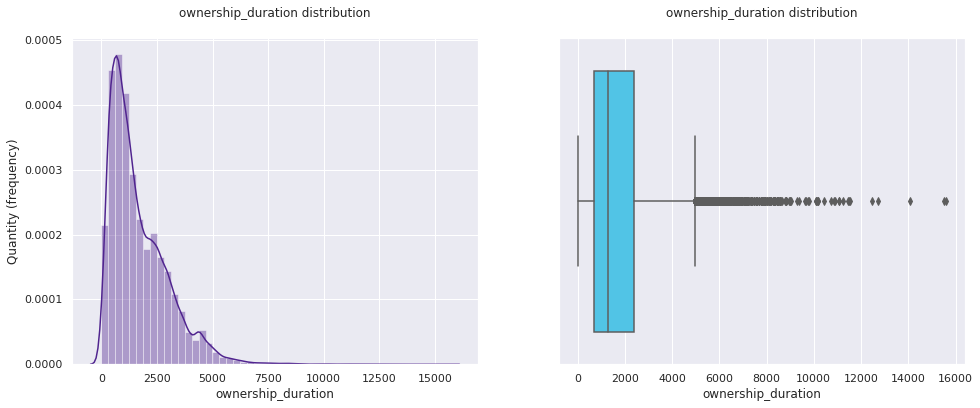

In [13]:
for c in nums_cols:
    show_IQR(train[c])

In [14]:
# for c in nums_cols:
#     show_IQR(test[c])

Unique values count: 35 
Q1: 2.0
Q3: 3.0
IQR: 1.0 
Outliers borders: [0.5, 4.5]


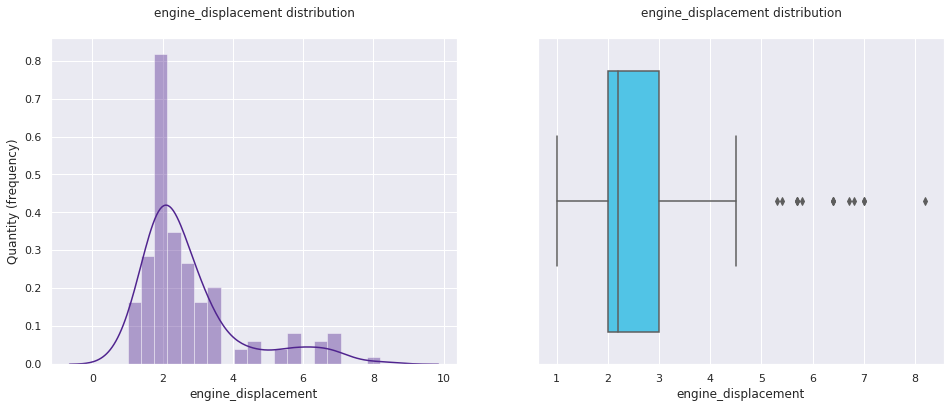

Unique values count: 62 
Q1: 55.0
Q3: 150.0
IQR: 95.0 
Outliers borders: [-87.5, 292.5]


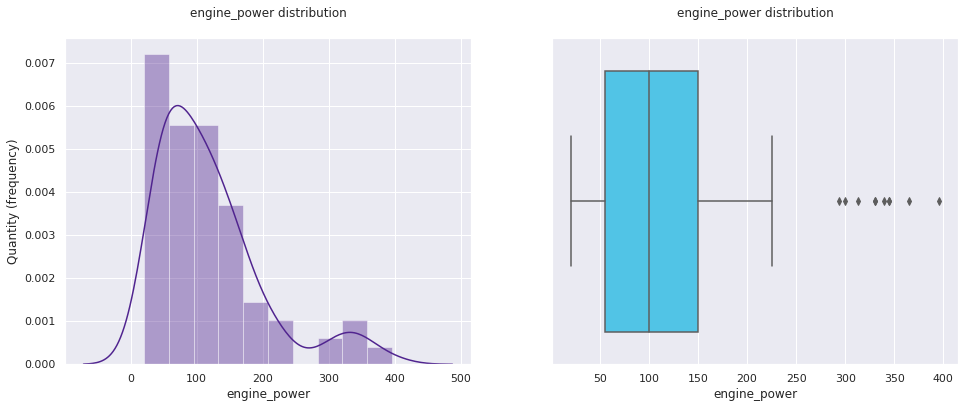

Unique values count: 89 
Q1: 27000.0
Q3: 150000.0
IQR: 123000.0 
Outliers borders: [-157500.0, 334500.0]


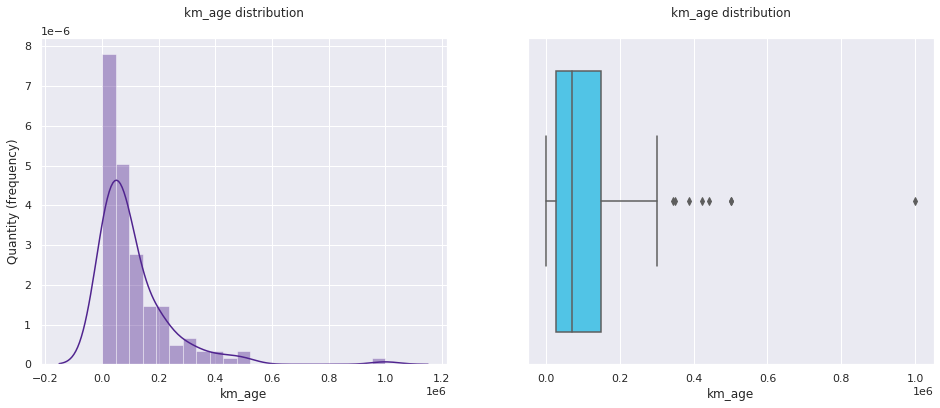

Unique values count: 37 
Q1: 1949.0
Q3: 1972.0
IQR: 23.0 
Outliers borders: [1914.5, 2006.5]


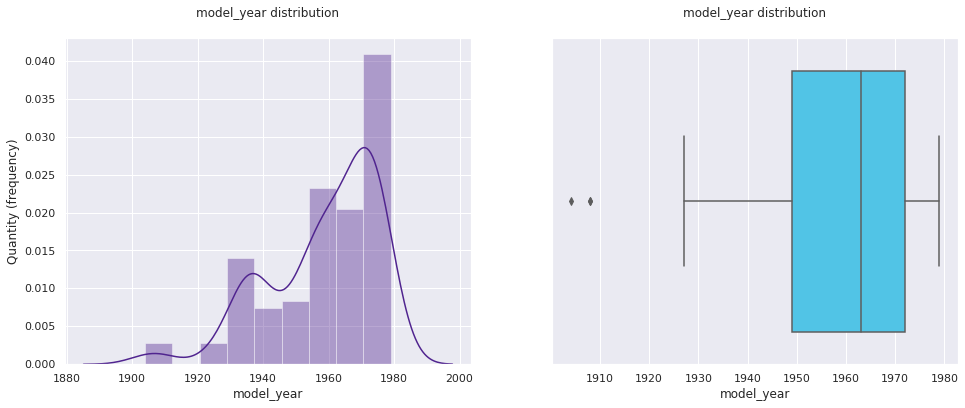

Unique values count: 39 
Q1: 1955.0
Q3: 1976.0
IQR: 21.0 
Outliers borders: [1923.5, 2007.5]


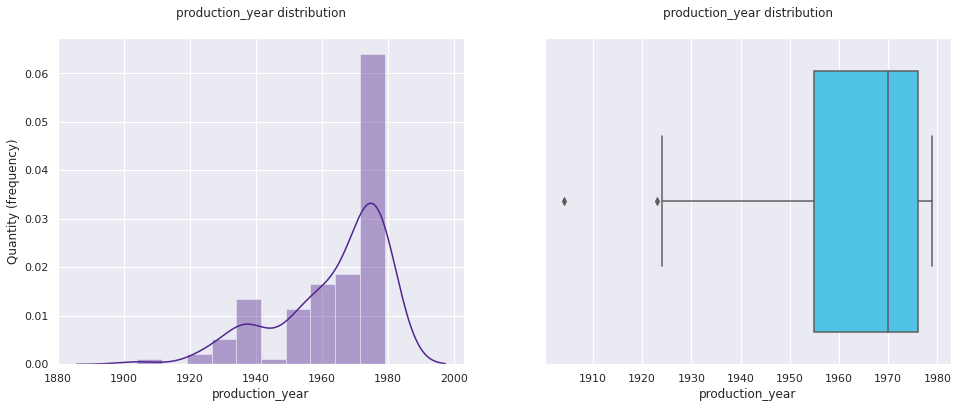

Unique values count: 52 
Q1: 1782.0
Q3: 5692.5
IQR: 3910.5 
Outliers borders: [-4083.75, 11558.25]


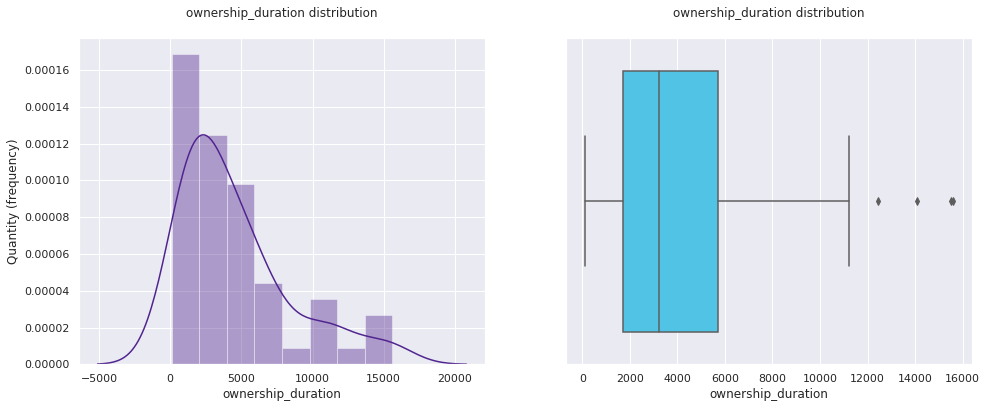

In [15]:
for c in nums_cols:
    show_IQR(train[train["production_year"] < 1980][c])

## Categorical columns overview

In [16]:
train.describe(include="object").T

,count,unique,top,freq
body_type,121928,16,внедорожник,48576
brand,121928,36,MERCEDES,10894
color,121928,16,чёрный,34475
description,118716,108066,рольф северо запад это первый мегамолл автомоб...,244
fuel_type,121928,5,бензин,101531
vehicle_transmission,121928,4,AUTOMATIC,68167
vendor,121928,5,EUROPEAN,60971
ptc,115705,2,Оригинал,101253
drive,116053,3,передний,58490
wheel,116052,2,Левый,112041


In [17]:
train["owners"].astype("object").describe()

count     105518.0
unique         3.0
top            3.0
freq       48700.0
Name: owners, dtype: float64

In [18]:
train[cat_cols].describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
number_of_doors,121928.0,4.540516,0.647913,0.0,4.0,5.0,5.0,5.0
owners,105518.0,2.190764,0.834217,1.0,1.0,2.0,3.0,3.0


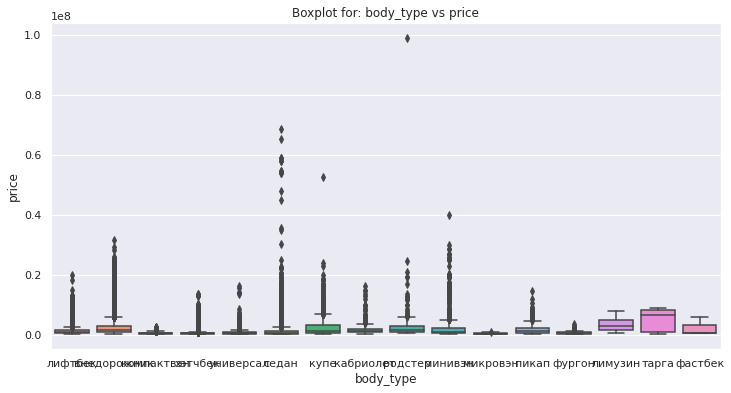

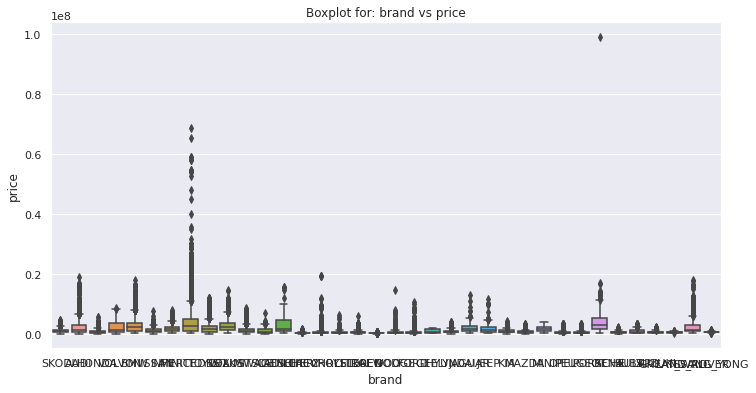

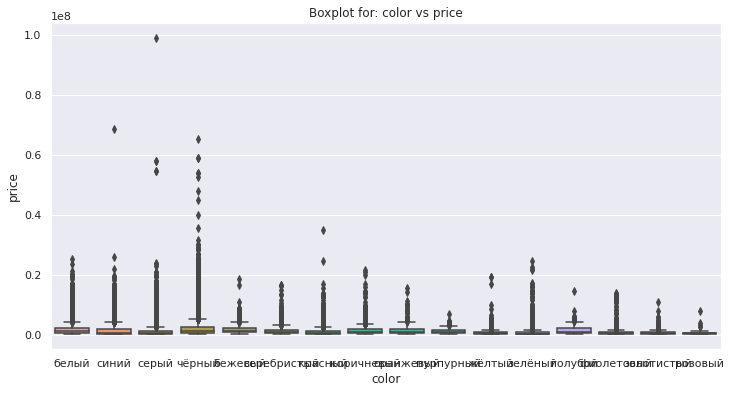

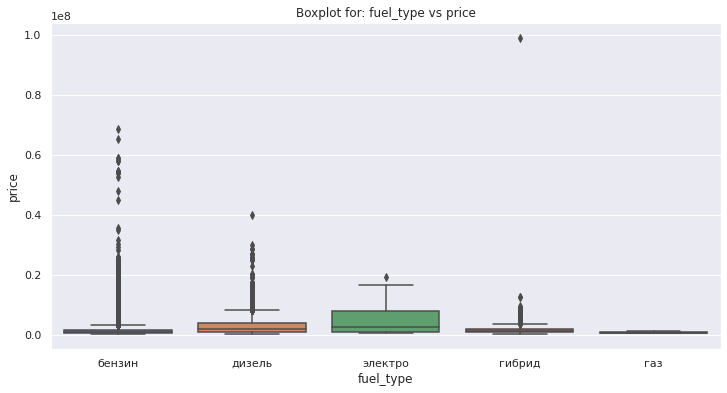

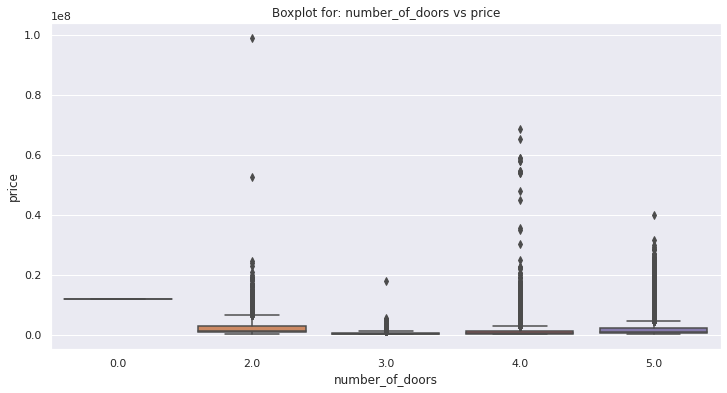

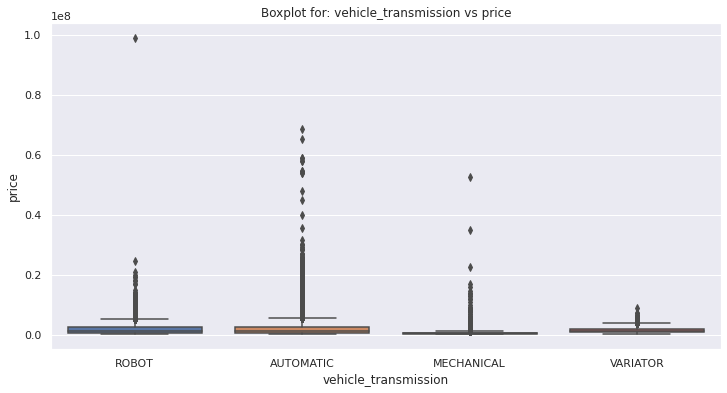

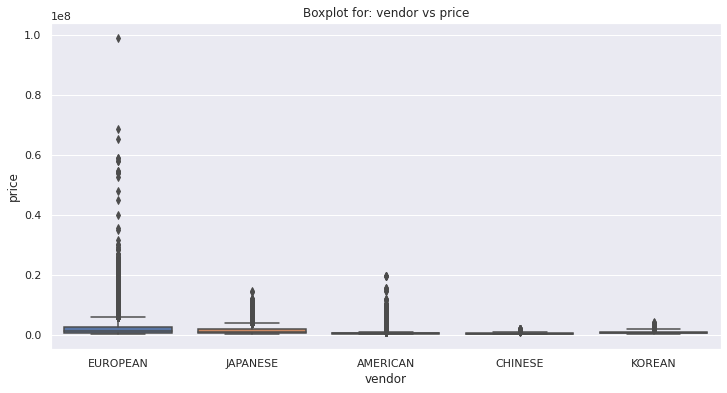

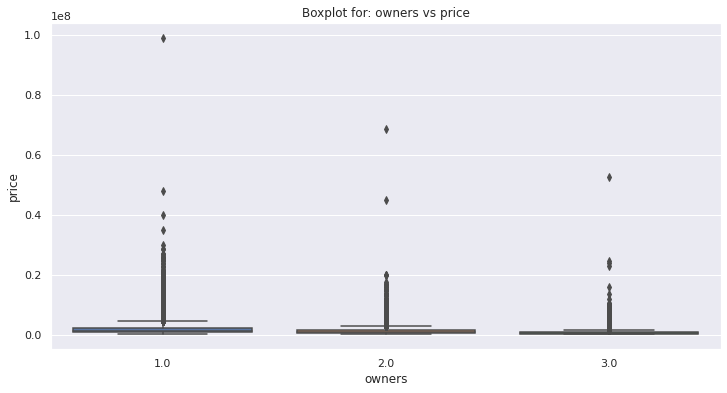

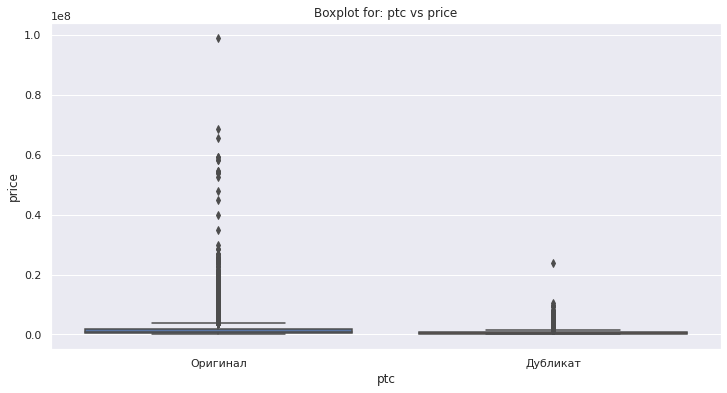

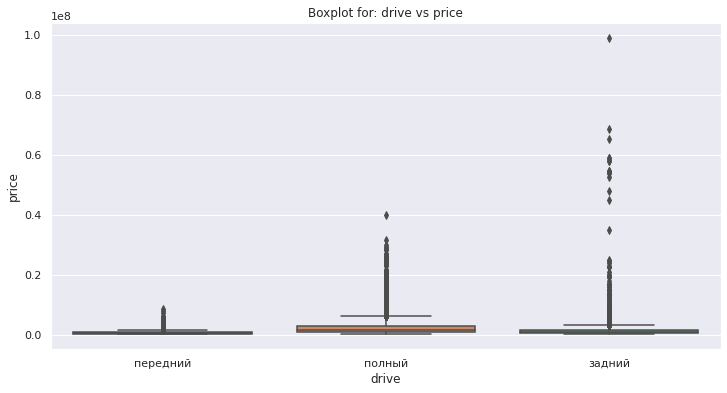

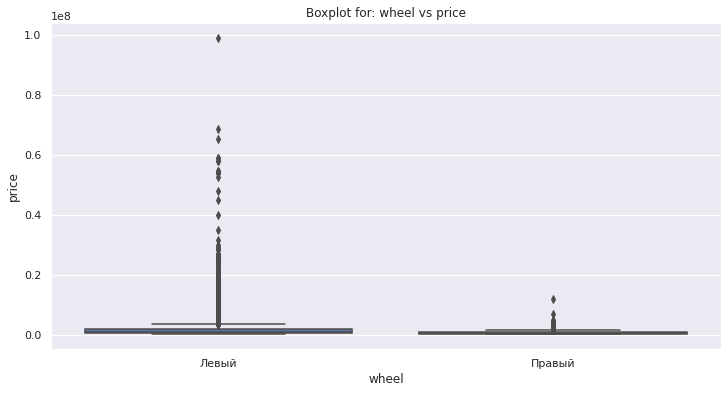

In [19]:
for c in cat_cols:
    show_boxplots(train, c, "price")

## Automated EDA

In [20]:
comp = sv.compare(train, test)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)



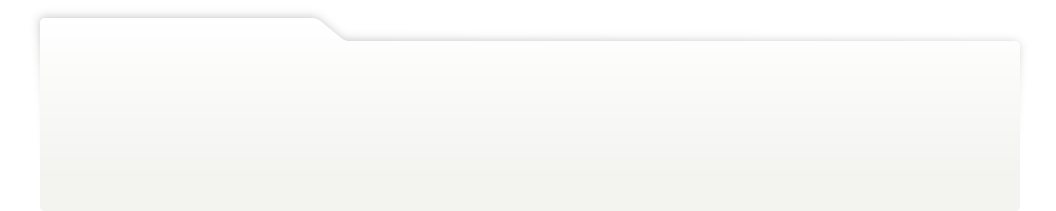
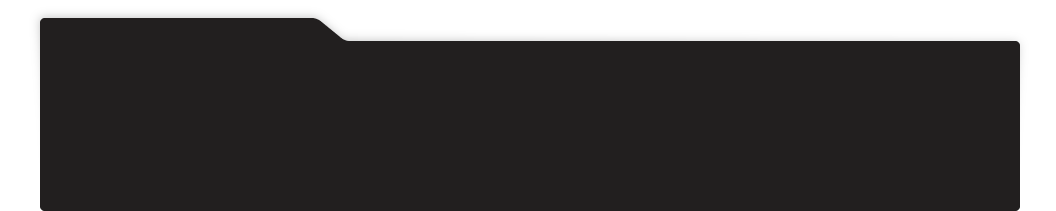
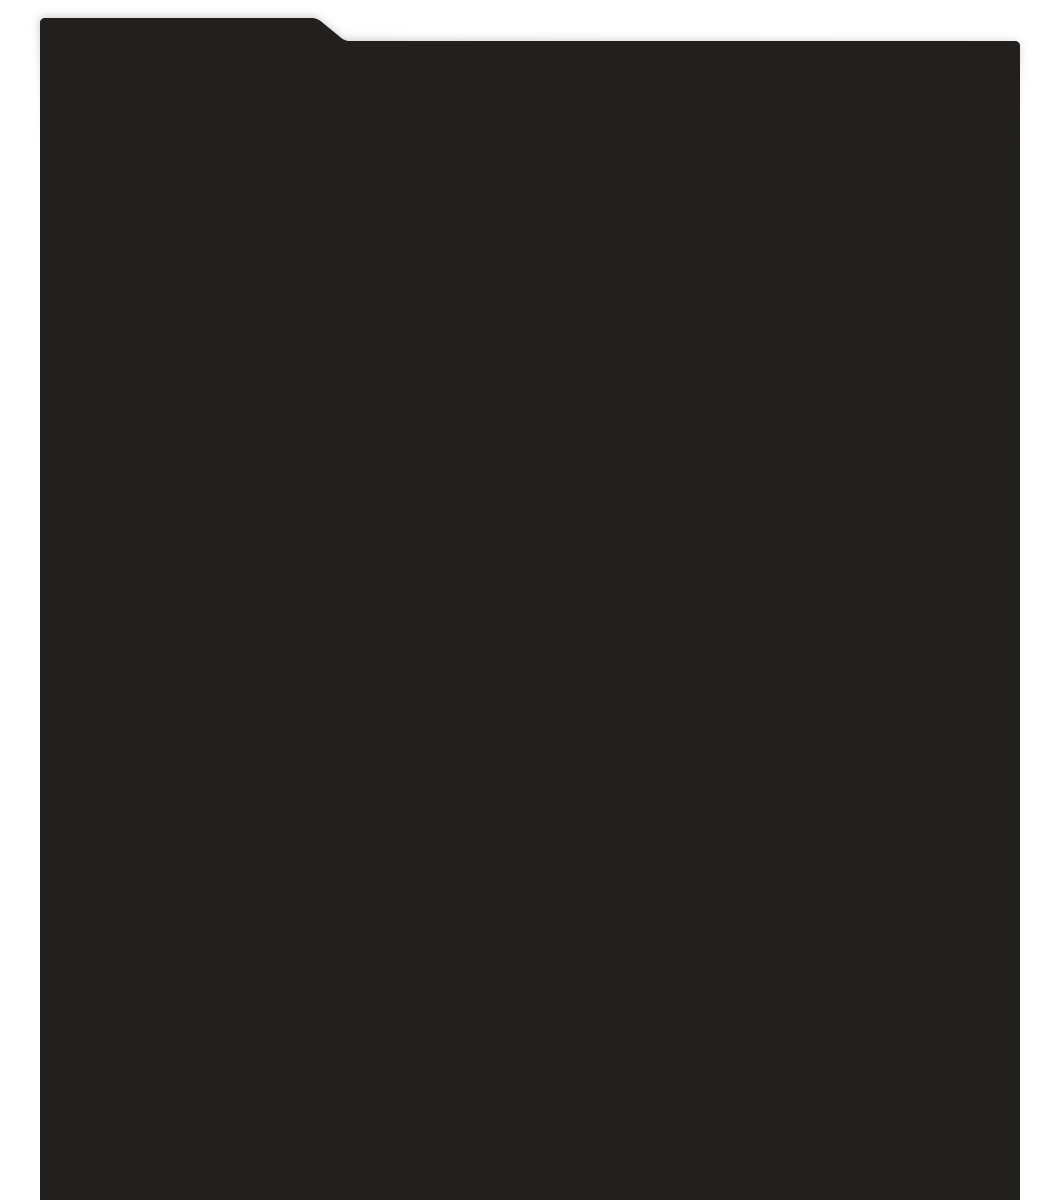
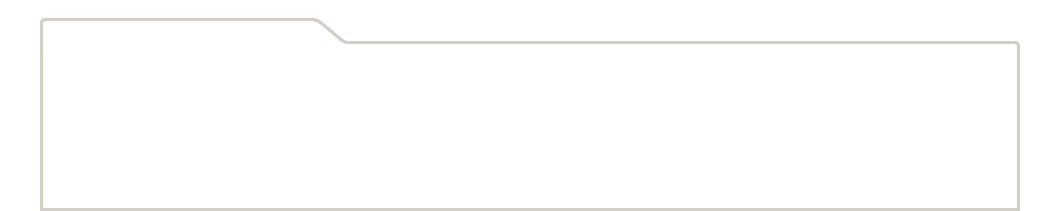
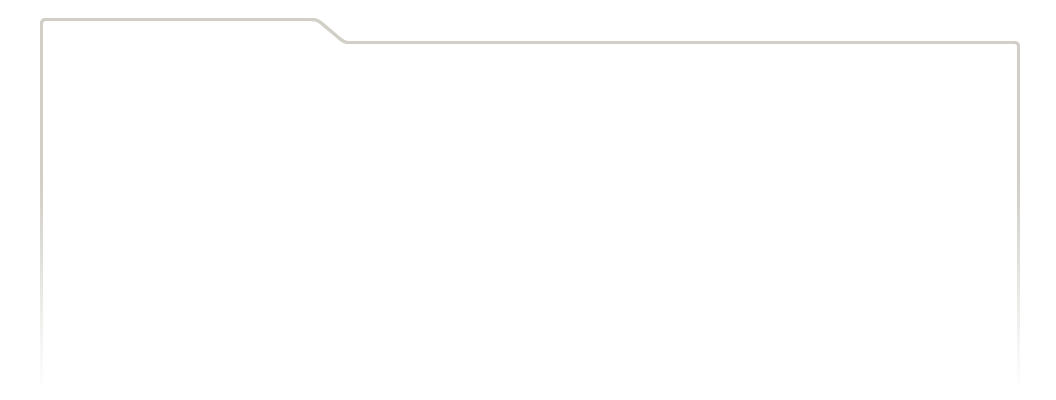
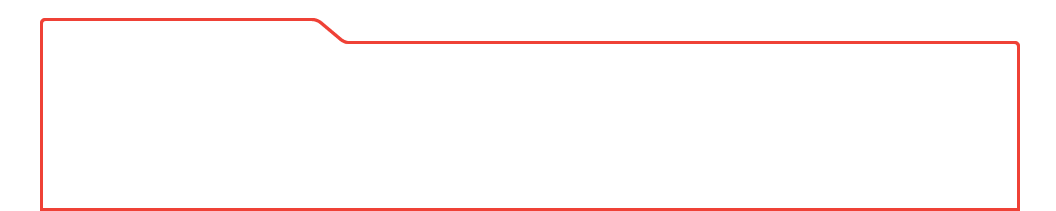
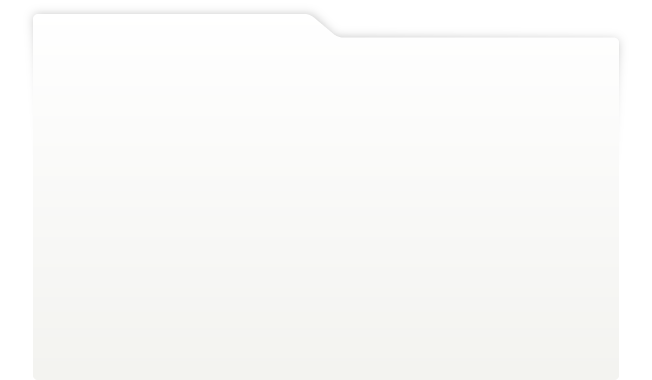
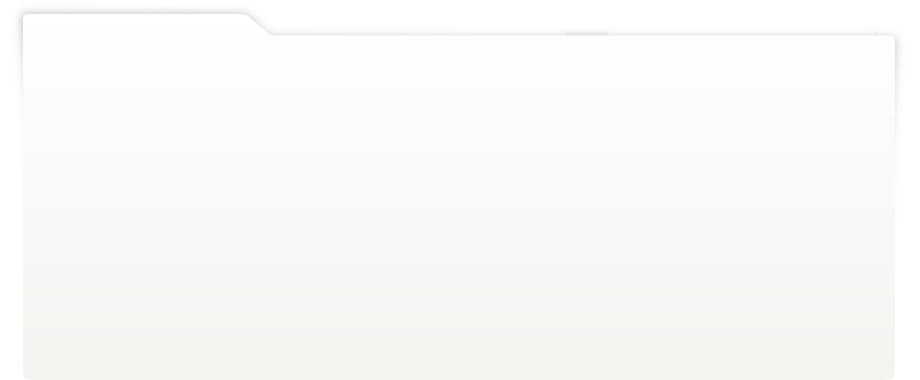
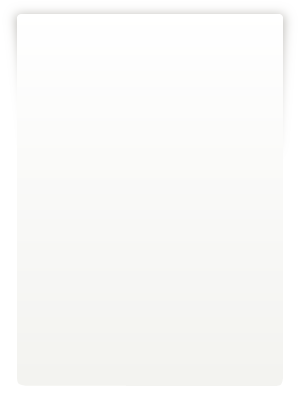
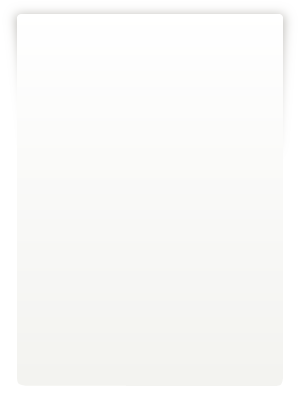
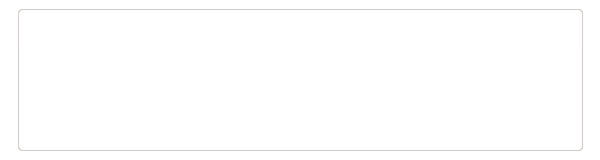
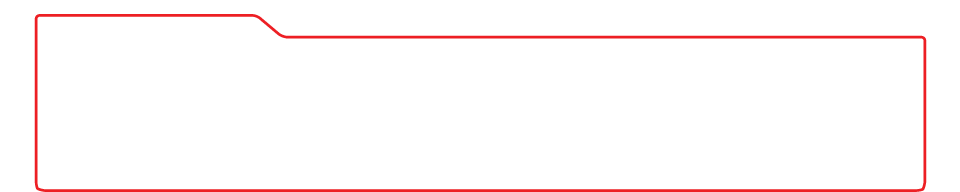
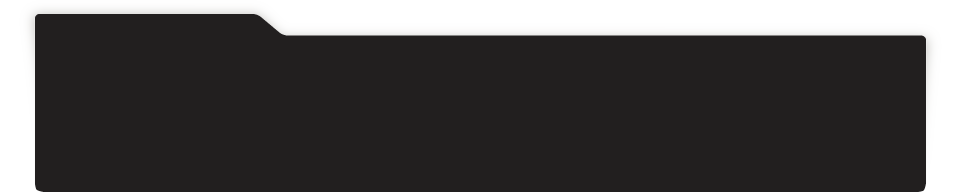
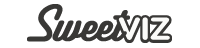
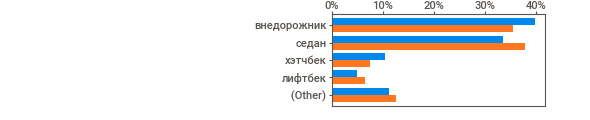
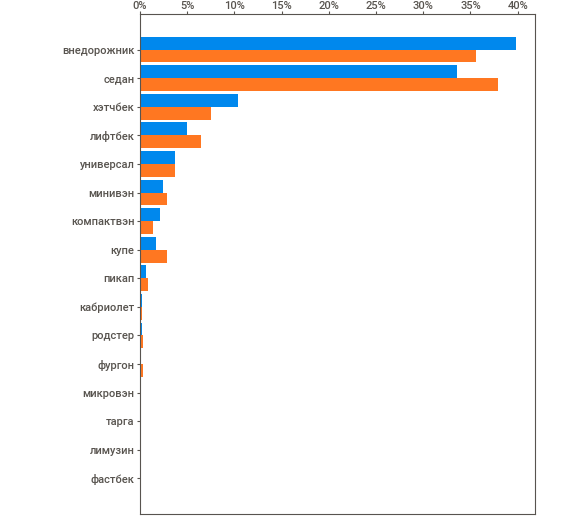
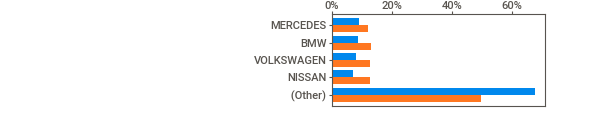
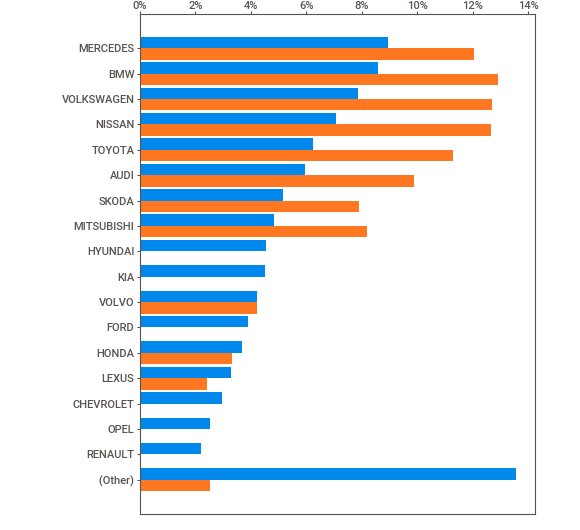
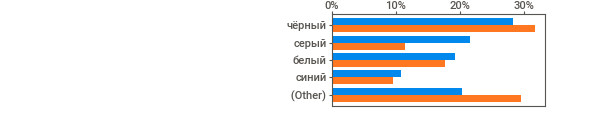
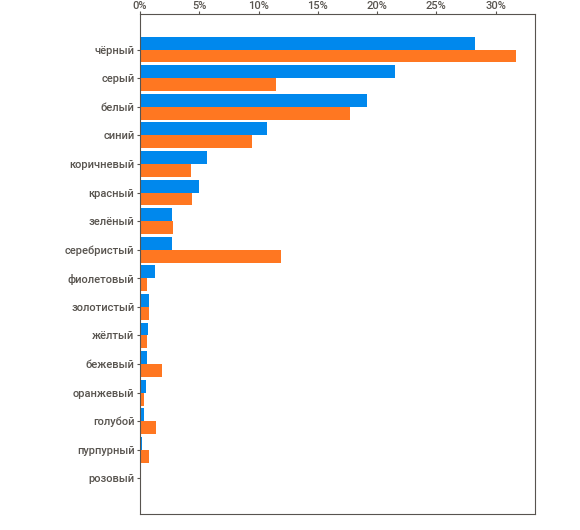
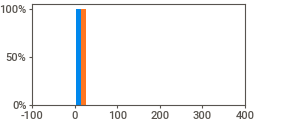
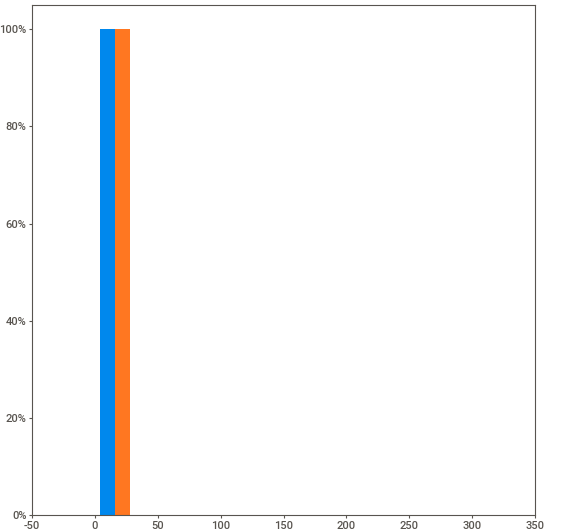
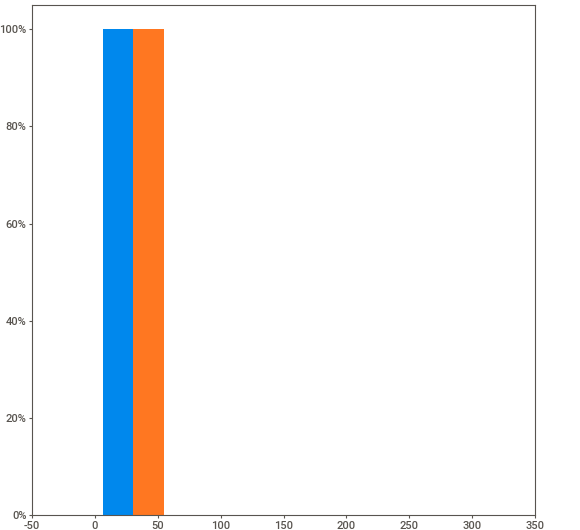
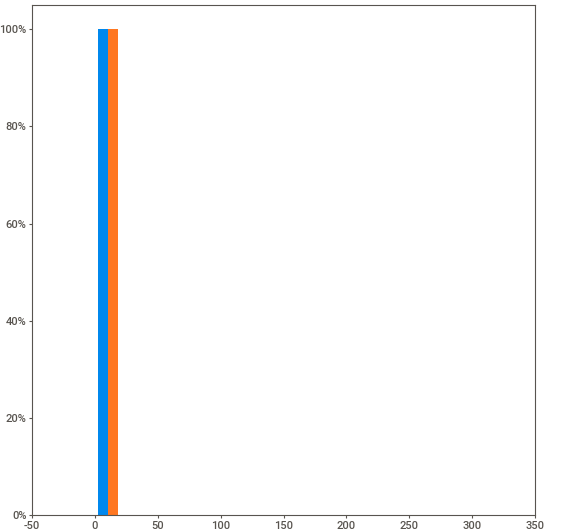
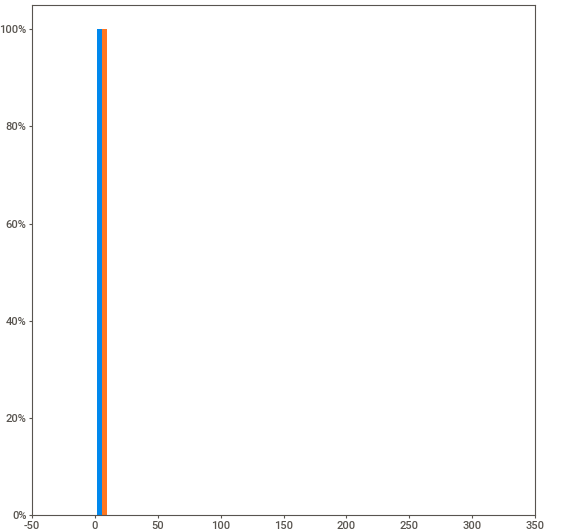
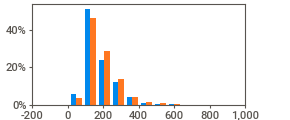
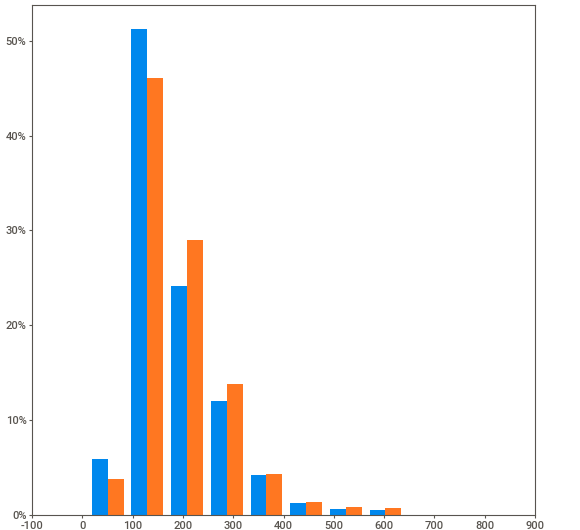
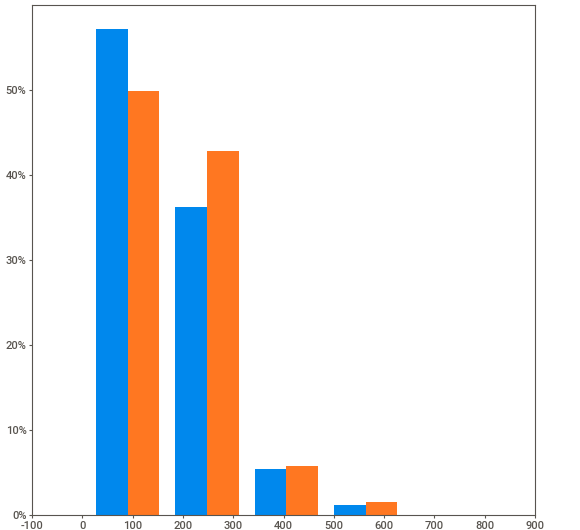
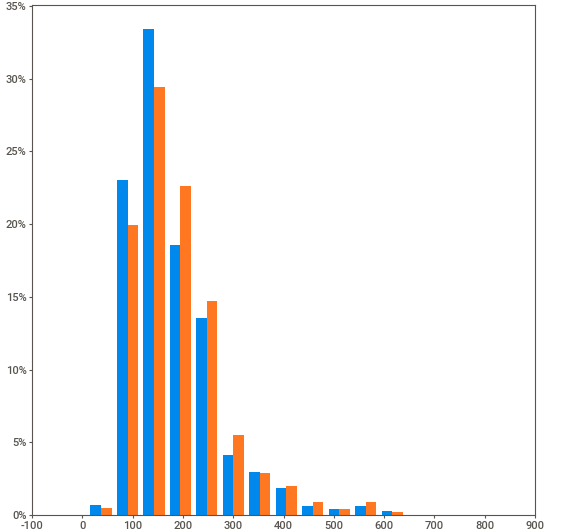
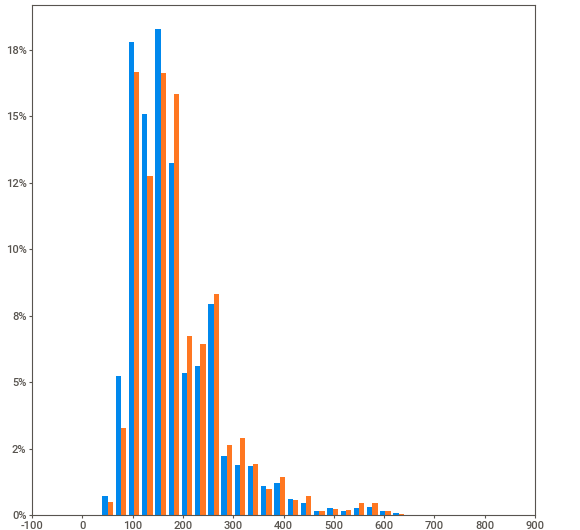
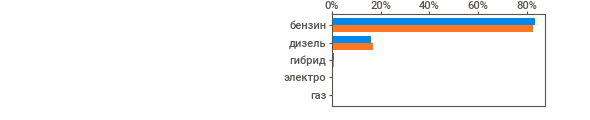
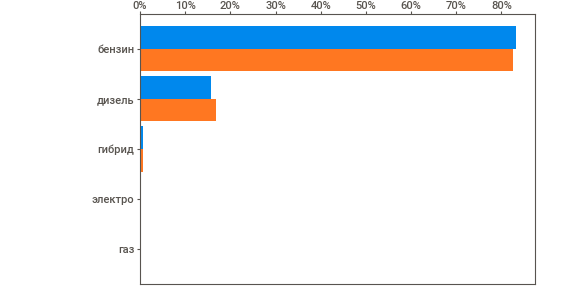
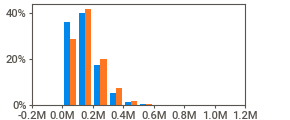
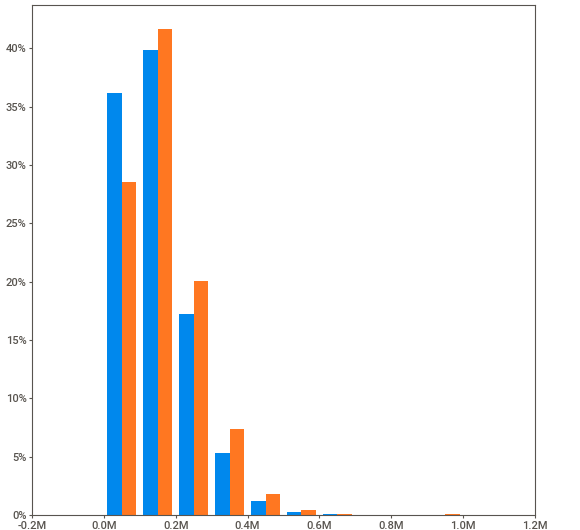
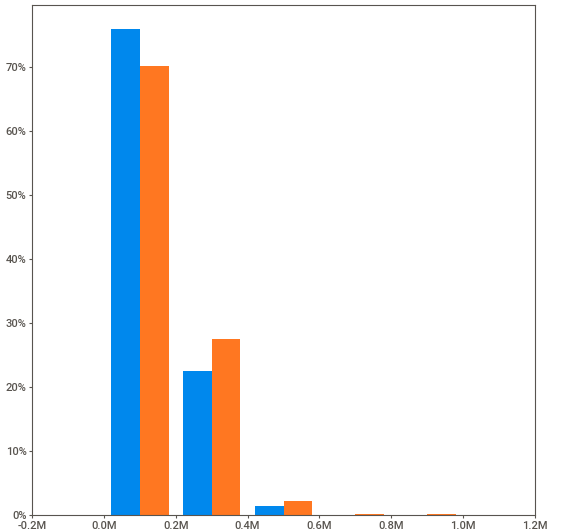
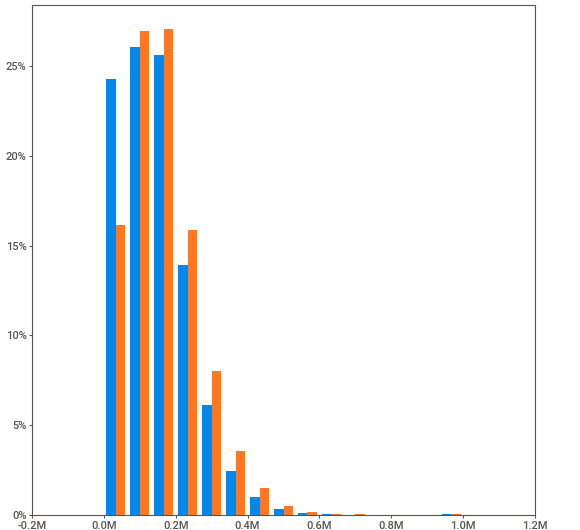
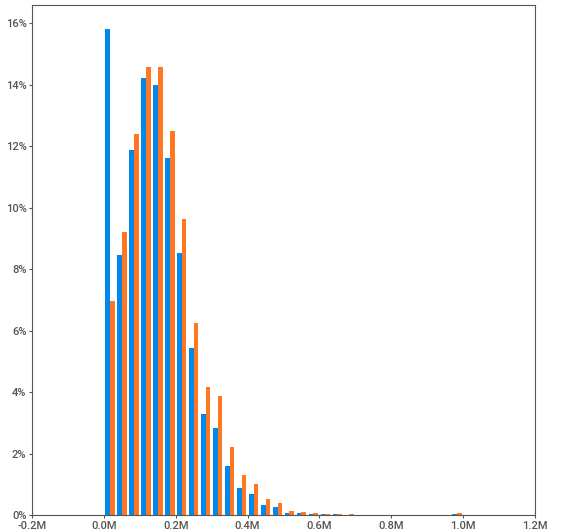
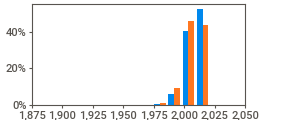
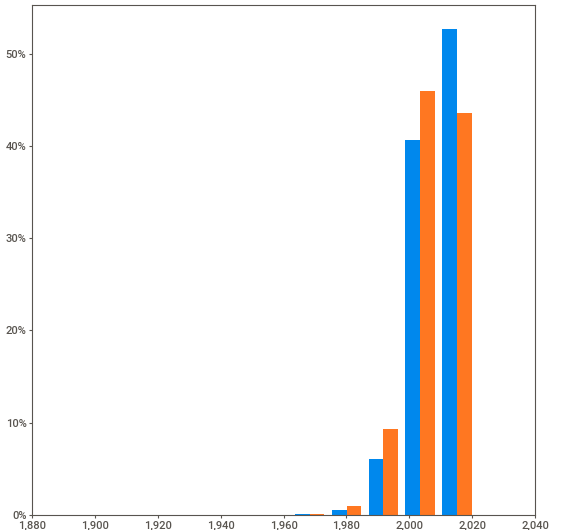
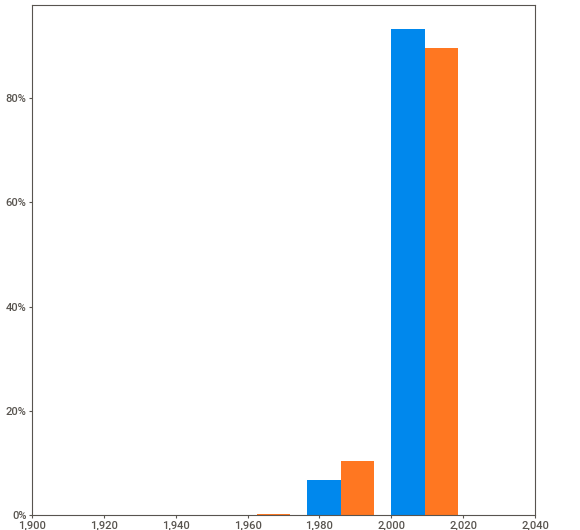
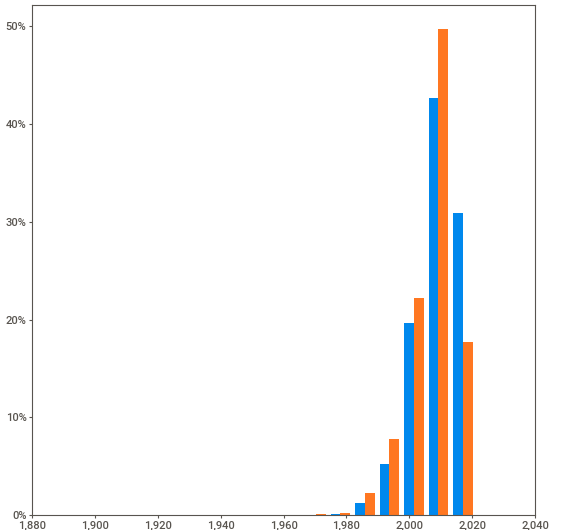
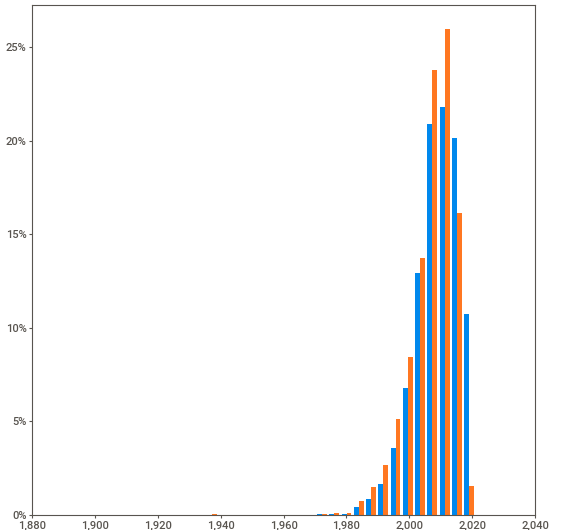
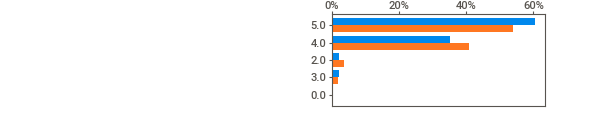
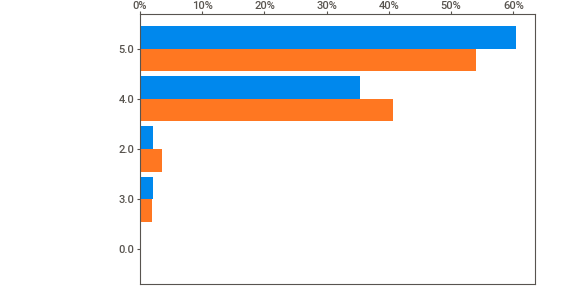
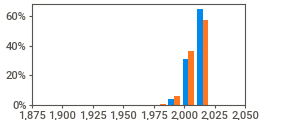
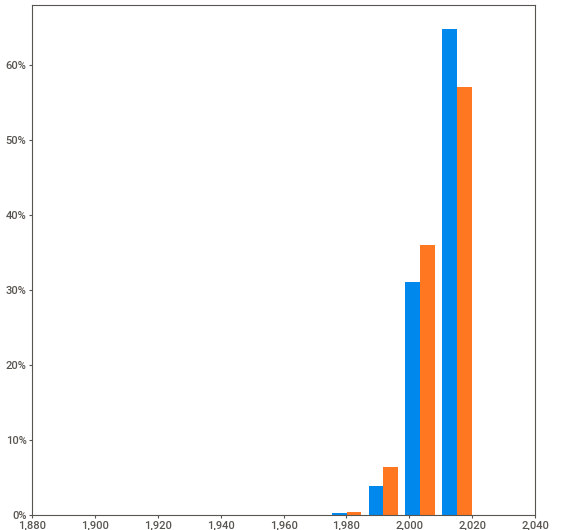
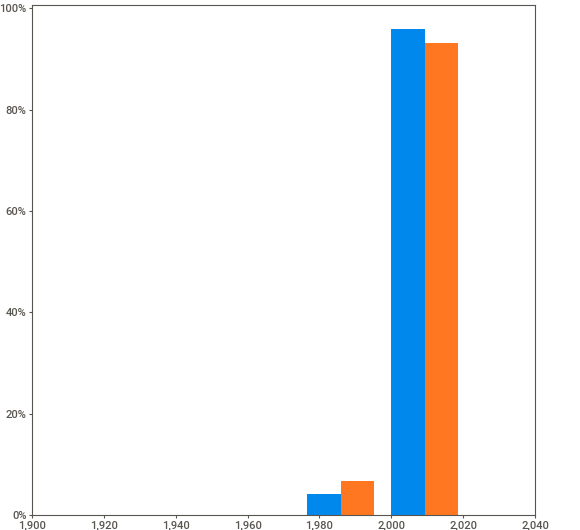
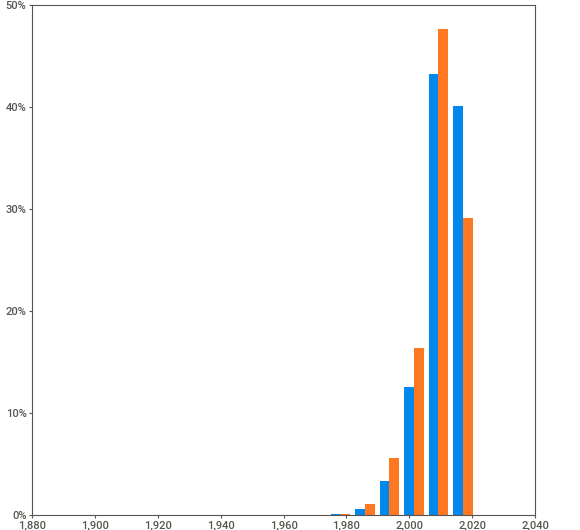
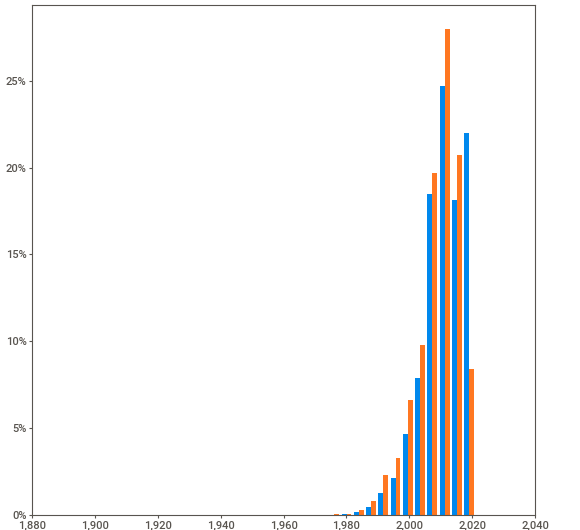
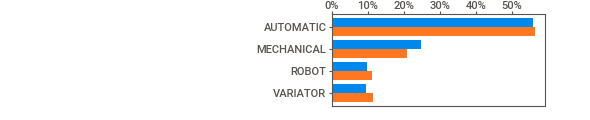
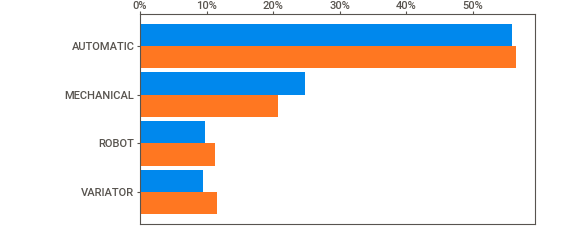
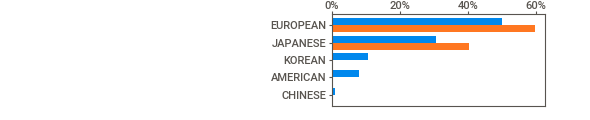
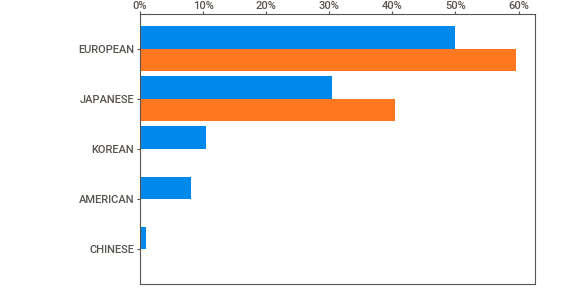
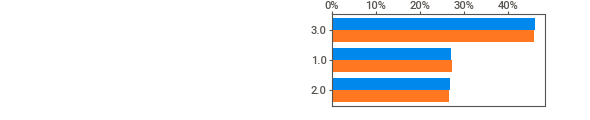
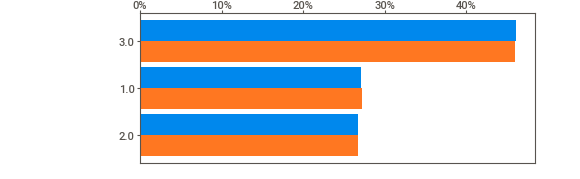
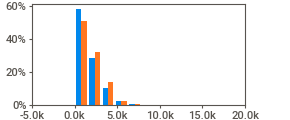
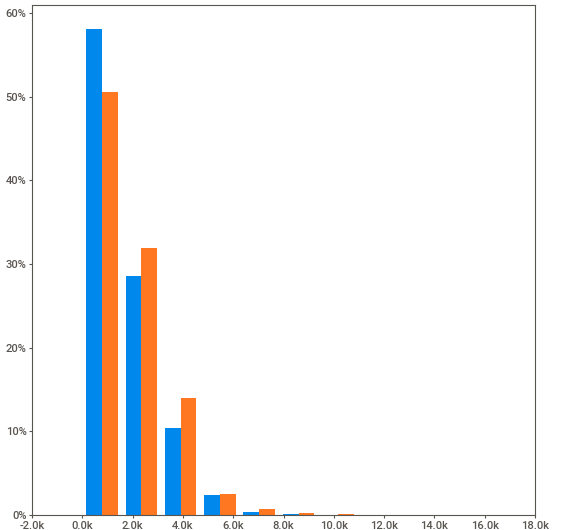
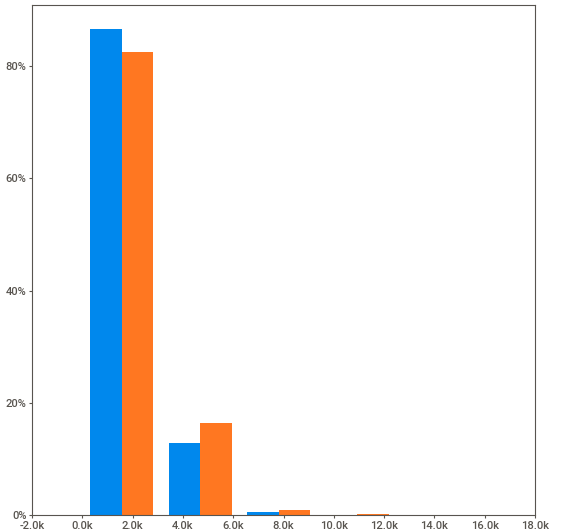
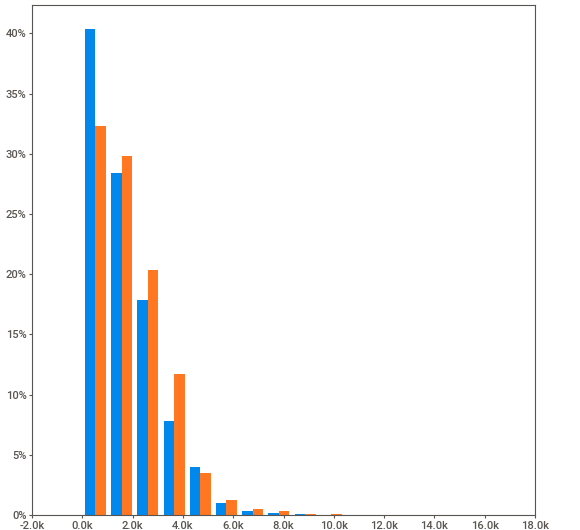
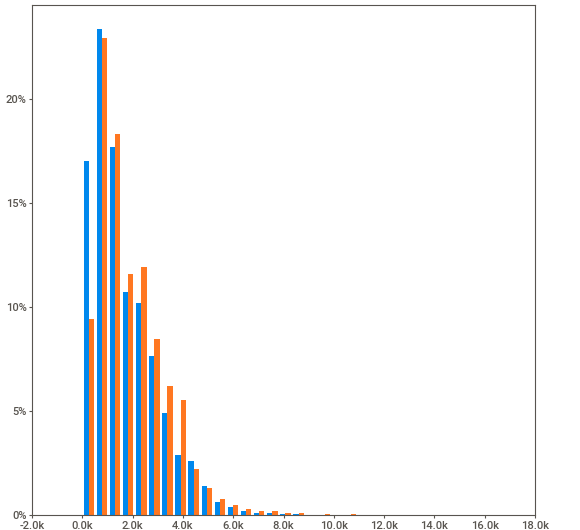
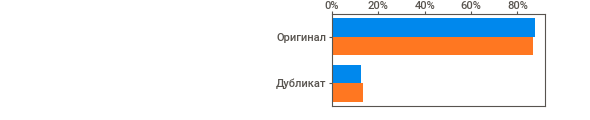
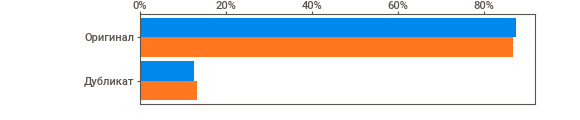
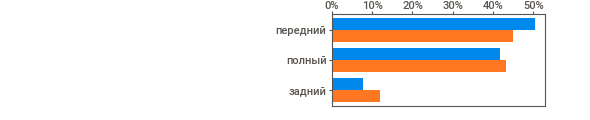
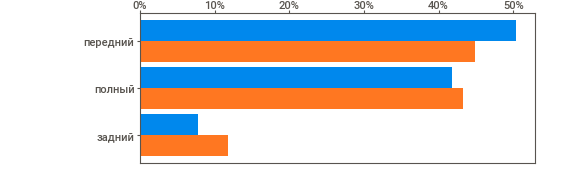
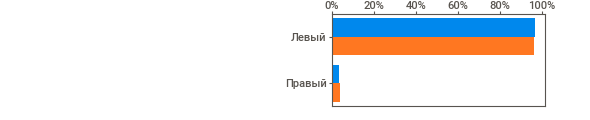
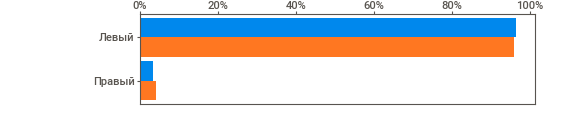
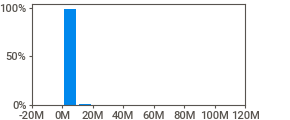
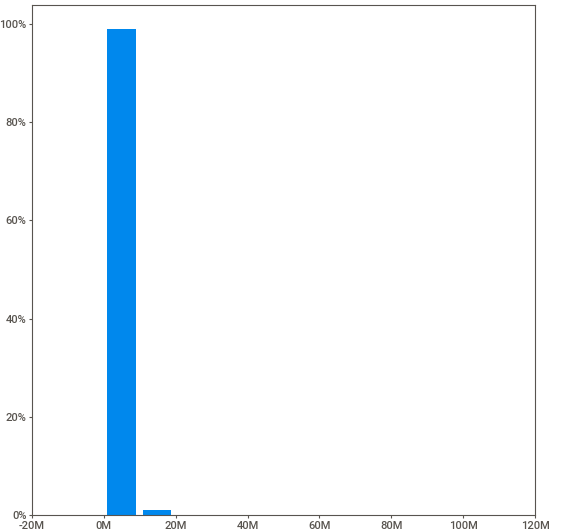
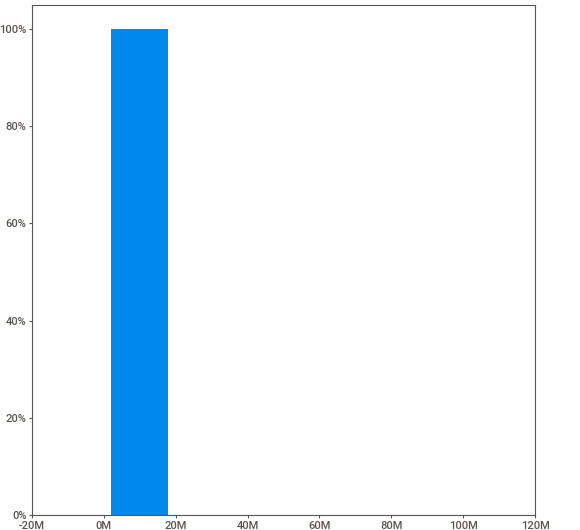
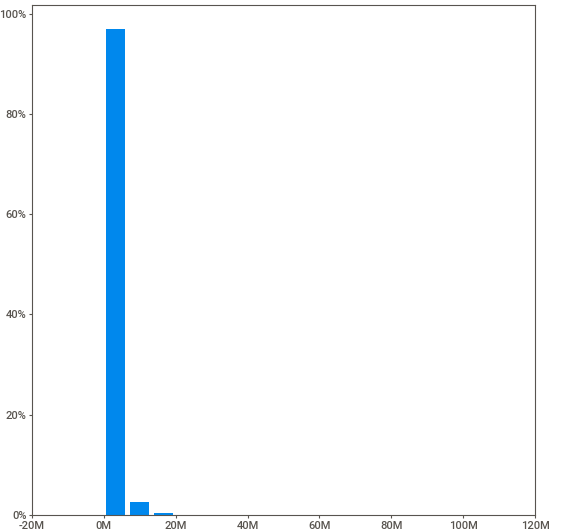
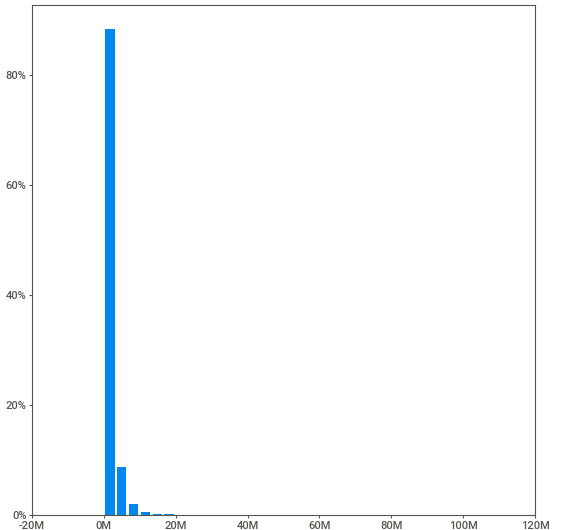
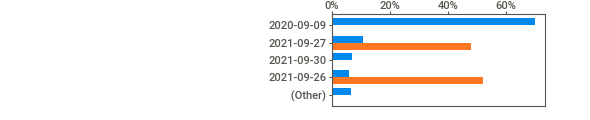
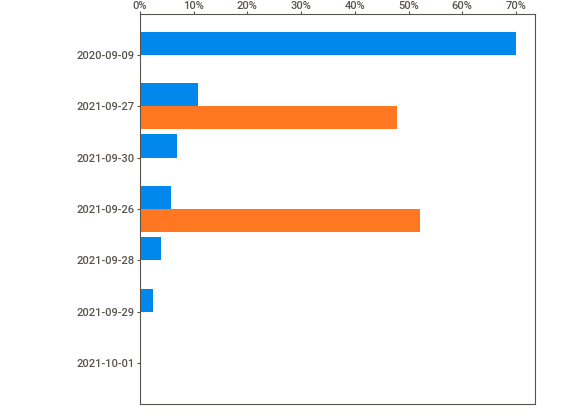
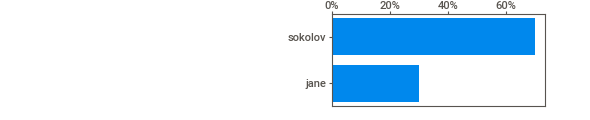
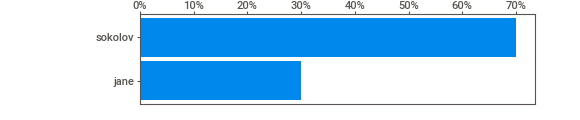
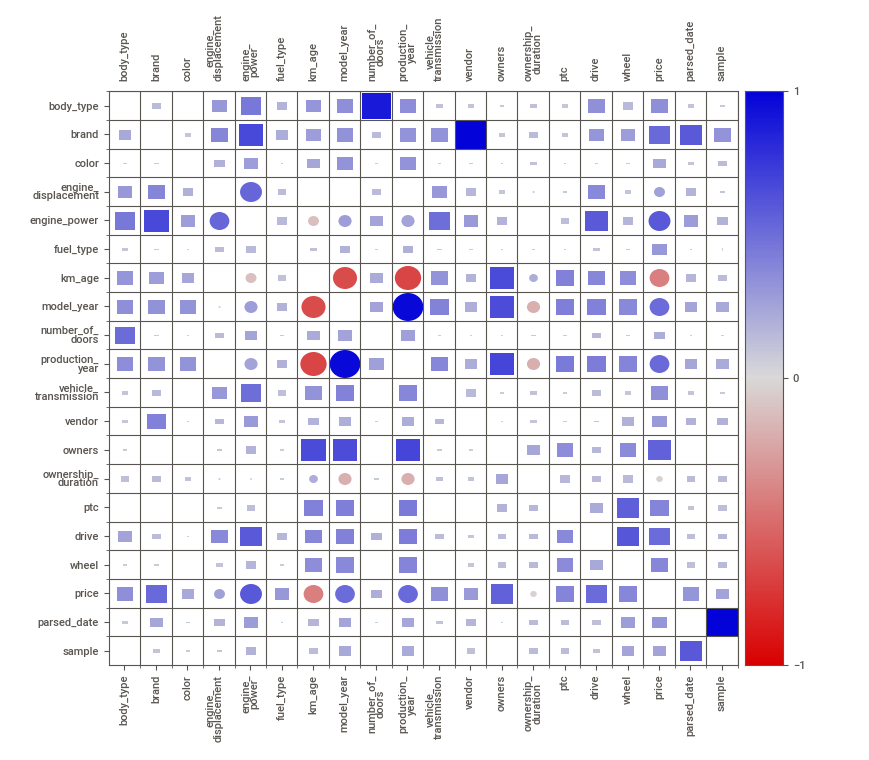
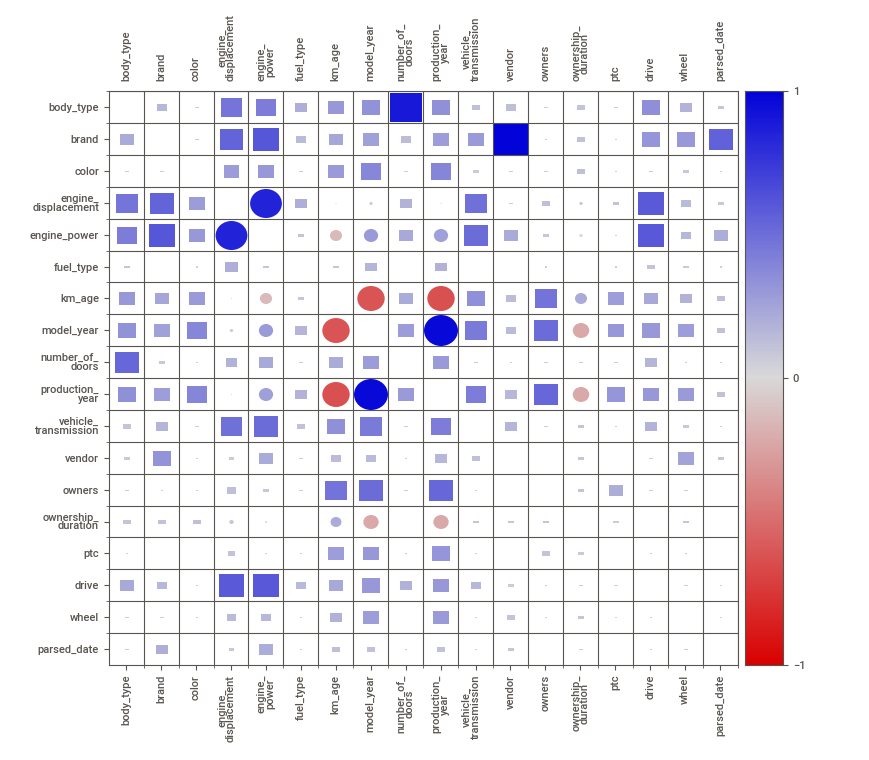

In [21]:
comp.show_notebook()

## Teatures TO DO

- **body_type** - fill na
- **brand** - 
- **color** - 
- **description** - 
- **engine_displacement** - 
- **engine_power** - 
- **fuel_type** - 
- **km_age** - 
- **model_year** - 
- **number_of_doors** - 
- **production_year** - 
- **vehicle_transmission** - 
- **vendor** - 
- **oweners** - 
- **owenership_duration** - 
- **ptc** - 
- **drive** - 
- **wheel** - 
- **price** - 

In [22]:
train.loc[train.body_type.isna()]

,body_type,brand,color,description,engine_displacement,engine_power,fuel_type,km_age,model_year,number_of_doors,production_year,vehicle_transmission,vendor,owners,ownership_duration,ptc,drive,wheel,price,parsed_date,sample


In [23]:
train.body_type.value_counts(dropna=False)

внедорожник    48576
седан          40942
хэтчбек        12641
лифтбек         6092
универсал       4508
минивэн         3009
компактвэн      2555
купе            2113
пикап            808
кабриолет        242
родстер          194
фургон           175
микровэн          54
тарга              9
лимузин            7
фастбек            3
Name: body_type, dtype: int64

In [24]:
test.body_type.value_counts(dropna=False)

седан          13165
внедорожник    12346
хэтчбек         2609
лифтбек         2232
универсал       1276
минивэн          995
купе             982
компактвэн       489
пикап            290
родстер           99
фургон            97
кабриолет         90
микровэн           7
лимузин            6
тарга              2
фастбек            1
Name: body_type, dtype: int64

#### 2 rows we can drop (they are informless)

In [25]:
train.loc[(train.km_age.isna()) & (train['production_year'] <= 2020.1)]

,body_type,brand,color,description,engine_displacement,engine_power,fuel_type,km_age,model_year,number_of_doors,production_year,vehicle_transmission,vendor,owners,ownership_duration,ptc,drive,wheel,price,parsed_date,sample
1042,лифтбек,SKODA,белый,рольф центр лучший дилер в области продаж в 20...,1.6,110.0,бензин,NaN,2020.0,5.0,2020.0,AUTOMATIC,EUROPEAN,NaN,NaN,NaN,NaN,NaN,1359300.0,2021-09-26,jane
2900,внедорожник,SKODA,бежевый,данная цена указана при приобретении автомоби...,1.4,150.0,бензин,NaN,2017.0,5.0,2020.0,ROBOT,EUROPEAN,NaN,NaN,NaN,NaN,NaN,2489900.0,2021-09-26,jane
2990,лифтбек,SKODA,белый,кредит сниженные ставки по кредиту оптимальные...,2.0,190.0,бензин,NaN,2019.0,5.0,2020.0,ROBOT,EUROPEAN,NaN,NaN,NaN,NaN,NaN,3087800.0,2021-09-26,jane
4623,седан,AUDI,бежевый,ауди центр запад новый дилер на 51 км мкад вас...,2.0,190.0,дизель,NaN,2018.0,4.0,2020.0,ROBOT,EUROPEAN,NaN,NaN,NaN,NaN,NaN,3775000.0,2021-09-26,jane
4729,седан,AUDI,белый,ауди центр запад новый дилер на 51 км мкад вас...,2.0,245.0,бензин,NaN,2018.0,4.0,2020.0,ROBOT,EUROPEAN,NaN,NaN,NaN,NaN,NaN,4879042.0,2021-09-26,jane
4876,седан,AUDI,бежевый,ауди центр запад новый дилер на 51 км мкад вас...,2.0,245.0,бензин,NaN,2018.0,4.0,2020.0,ROBOT,EUROPEAN,NaN,NaN,NaN,NaN,NaN,4879042.0,2021-09-26,jane
4903,седан,AUDI,белый,ауди центр запад новый дилер на 51 км мкад вас...,2.0,245.0,бензин,NaN,2018.0,4.0,2020.0,ROBOT,EUROPEAN,NaN,NaN,NaN,NaN,NaN,4225000.0,2021-09-26,jane
6086,седан,AUDI,бежевый,ауди центр запад новый дилер на 51 км мкад вас...,2.0,245.0,бензин,NaN,2018.0,4.0,2020.0,ROBOT,EUROPEAN,NaN,NaN,NaN,NaN,NaN,4879042.0,2021-09-26,jane
6455,седан,AUDI,бежевый,ауди центр запад новый дилер на 51 км мкад вас...,2.0,245.0,бензин,NaN,2018.0,4.0,2020.0,ROBOT,EUROPEAN,NaN,NaN,NaN,NaN,NaN,4225000.0,2021-09-26,jane
6711,седан,AUDI,белый,ауди центр запад новый дилер на 51 км мкад вас...,2.0,245.0,бензин,NaN,2018.0,4.0,2020.0,ROBOT,EUROPEAN,NaN,NaN,NaN,NaN,NaN,4225000.0,2021-09-26,jane


## My opinion - it's new cars. We can fill NaNs by 0 or random (20-50 km)

In [26]:
train.loc[(train.engine_displacement.isna()) & (train.fuel_type != 'электро')]

,body_type,brand,color,description,engine_displacement,engine_power,fuel_type,km_age,model_year,number_of_doors,production_year,vehicle_transmission,vendor,owners,ownership_duration,ptc,drive,wheel,price,parsed_date,sample


## So it's electro cars. We can fill NaNs by 0

In [27]:
train.loc[train.owners.isna()][['model_year', 'production_year']].value_counts()

model_year  production_year
2018.0      2020.0             2947
2017.0      2020.0             2152
2020.0      2021.0             1810
2019.0      2020.0             1571
2017.0      2021.0             1428
2020.0      2020.0             1267
2016.0      2020.0             1158
2018.0      2021.0             1131
2019.0      2021.0             1040
2017.0      2019.0              444
2014.0      2020.0              244
2018.0      2019.0              228
2015.0      2020.0              226
2021.0      2021.0              162
2014.0      2021.0              122
2016.0      2019.0               98
            2021.0               87
2014.0      2019.0               62
2019.0      2019.0               57
2018.0      2018.0               46
2015.0      2019.0               35
2012.0      2020.0               32
2017.0      2018.0               16
2015.0      2021.0               15
2014.0      2018.0                9
2015.0      2018.0                7
2013.0      2020.0                7
